Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data --> COMPLETE

### Importing all the important libraries

In [64]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [65]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [66]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset --> COMPLETE
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [67]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [68]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [69]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#train_ds = ##todo --> COMPLETE
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2,subset='training'
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [70]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset --> COMPLETE
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test, batch_size=batch_size, image_size=(img_height,
    img_width), shuffle=True, seed=123, validation_split=0.2,subset='validation'
)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [71]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset --> IPR

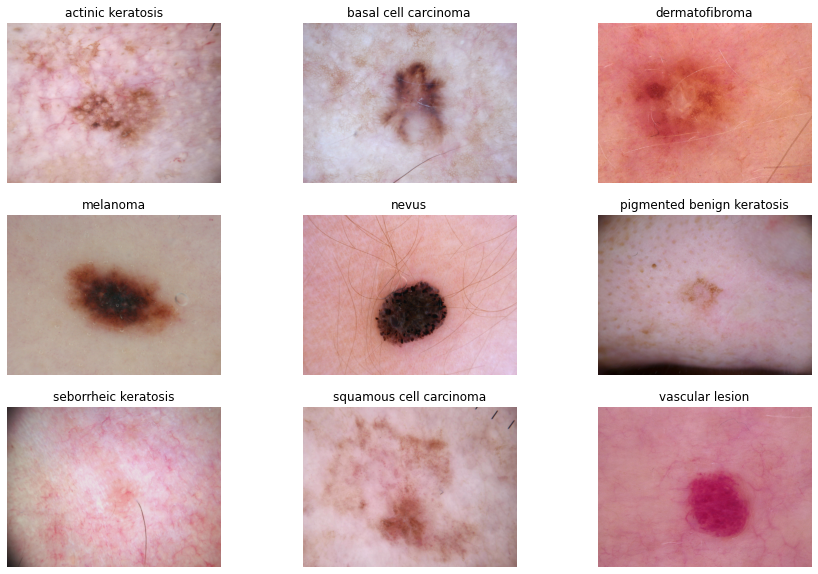

In [72]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(data_dir_train), class_)
    file_path = glob.glob(os.path.join(data_path,'*.jpg'))[0]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [73]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [74]:
### Your code goes here
# Model - Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Flatten -> Dense -> Dense
model = Sequential([
                  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPool2D(),
                  layers.Flatten(),
                  layers.Dense(128,activation='relu'),
                  layers.Dense(9,activation='softmax')
              ])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [75]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [77]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 28s 29ms/step - loss: 1.9382 - accuracy: 0.2615 - val_loss: 2.3749 - val_accuracy: 0.2174
Epoch 2/20
169/169 [==============================] - 4s 21ms/step - loss: 1.4399 - accuracy: 0.4579 - val_loss: 2.8613 - val_accuracy: 0.1304
Epoch 3/20
169/169 [==============================] - 4s 21ms/step - loss: 1.2654 - accuracy: 0.5237 - val_loss: 2.1405 - val_accuracy: 0.3478
Epoch 4/20
169/169 [==============================] - 4s 21ms/step - loss: 1.0637 - accuracy: 0.6139 - val_loss: 2.7372 - val_accuracy: 0.3478
Epoch 5/20
169/169 [==============================] - 4s 21ms/step - loss: 0.9035 - accuracy: 0.6743 - val_loss: 2.9994 - val_accuracy: 0.2609
Epoch 6/20
169/169 [==============================] - 4s 21ms/step - loss: 0.7914 - accuracy: 0.7183 - val_loss: 3.9645 - val_accuracy: 0.2174
Epoch 7/20
169/169 [==============================] - 4s 21ms/step - loss: 0.6288 - accuracy: 0.7771 - val_loss: 5.0010 - val_accuracy: 0.1304
Epoch 8/2

### Visualizing training results

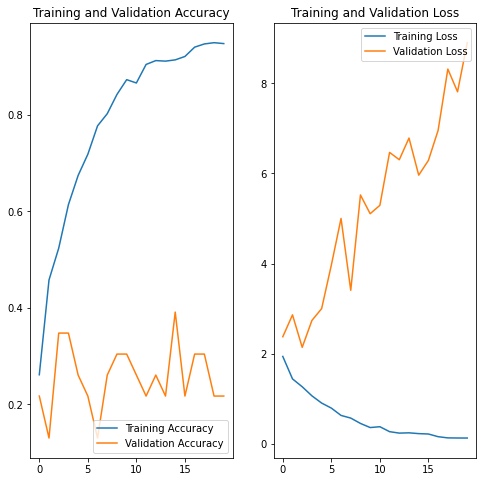

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit --> COMPLETE

### Write your findings here
- It is evident that the above model shows nice training accuracy, however the test accuracy is very poor. The model has learnt the training data and is clearly **overfitting**.

In [79]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
# We are going to use the "horizontal" randomflip as an augmentation layer, and see the improvement in the model performance. 
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [80]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

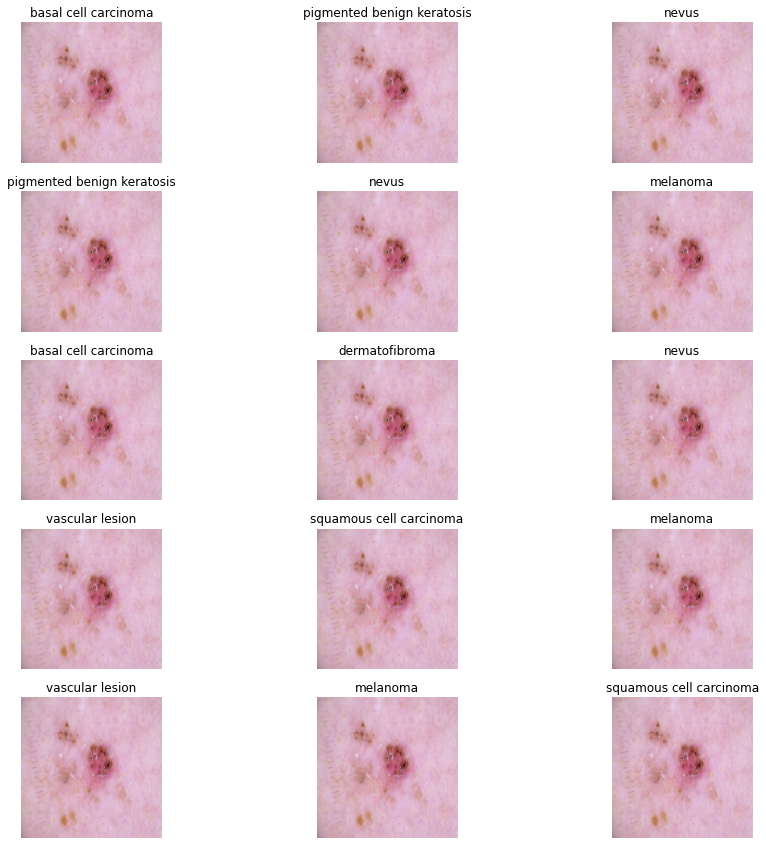

In [81]:
# Todo, visualize how your augmentation strategy works for one instance of training image. --> COMPLETE
# Your code goes here
plt.figure(figsize=(15, 15))
for images, label in train_ds.take(1):
    for i in range(15):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(5, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [82]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes = 9

# Building model with data augmentation and drop out layers
# Model building - Data augmentation -> Rescaling -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = data_augmentation
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(64, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.15))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))


### Compiling the model

In [83]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [84]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 5s 25ms/step - loss: 1.8422 - accuracy: 0.2960 - val_loss: 1.8564 - val_accuracy: 0.3043
Epoch 2/20
169/169 [==============================] - 4s 23ms/step - loss: 1.4689 - accuracy: 0.4364 - val_loss: 2.0304 - val_accuracy: 0.3043
Epoch 3/20
169/169 [==============================] - 4s 24ms/step - loss: 1.3834 - accuracy: 0.4727 - val_loss: 1.8502 - val_accuracy: 0.3043
Epoch 4/20
169/169 [==============================] - 4s 24ms/step - loss: 1.2945 - accuracy: 0.5135 - val_loss: 1.8887 - val_accuracy: 0.2174
Epoch 5/20
169/169 [==============================] - 4s 24ms/step - loss: 1.2836 - accuracy: 0.5139 - val_loss: 2.1500 - val_accuracy: 0.3478
Epoch 6/20
169/169 [==============================] - 4s 24ms/step - loss: 1.1824 - accuracy: 0.5477 - val_loss: 2.2074 - val_accuracy: 0.3478
Epoch 7/20
169/169 [==============================] - 4s 24ms/step - loss: 1.1508 - accuracy: 0.5668 - val_loss: 2.3584 - val_accuracy: 0.2609

### Visualizing the results

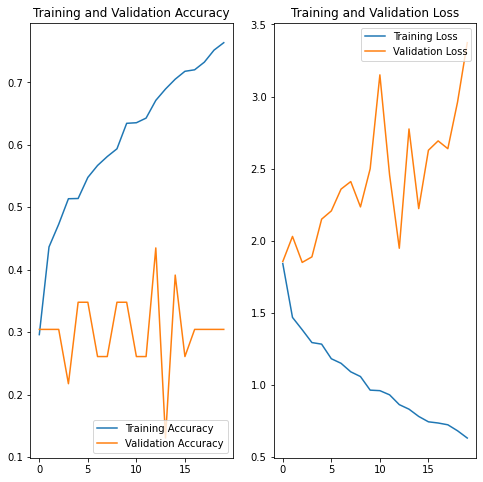

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- There is definitely some improvement after performing data augmentation using the "horizontal" random flip.
- Next we will try to use the "Augmentor" library to do the same, after checking for class imbalance.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [86]:
## Your code goes here.
from glob import glob
import os 
path_list=[x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
cancer_type_list=[os.path.basename(os.path.dirname(i)) for i in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

In [87]:
original_df=pd.DataFrame(list(dict(zip(path_list,cancer_type_list)).items()),columns=['path','cancer_type'])

In [88]:
original_df['cancer_type'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: cancer_type, dtype: int64

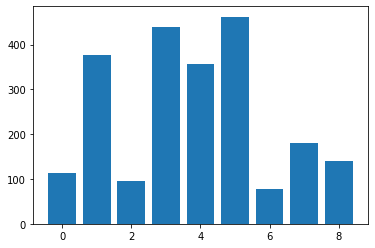

In [89]:
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
x,y=original_df['path'],original_df['cancer_type']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- The class `seborrheic keratosis` (class 6) has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
- The classes `basal cell carcinoma(class 1)`, `melanoma(class 3)` and `pigmented benign keratosis(class 5)` dominate in terms of proportionate number of samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [90]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [102]:
path_to_training_dataset="/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F658871B850>: 100%|██████████| 500/500 [00:18<00:00, 27.64 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F657FC99DD0>: 100%|██████████| 500/500 [00:18<00:00, 27.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6588F97090>: 100%|██████████| 500/500 [00:18<00:00, 26.32 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7F658870AB50>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2530x2122 at 0x7F657FBFE7D0>: 100%|██████████| 500/500 [01:17<00:00,  6.43 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F65887236D0>: 100%|██████████| 500/500 [00:17<00:00, 28.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6588FA54D0>: 100%|██████████| 500/500 [00:41<00:00, 12.02 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6588767E10>: 100%|██████████| 500/500 [00:17<00:00, 27.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6619BA1190>: 100%|██████████| 500/500 [00:18<00:00, 26.99 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [130]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [120]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_2c1d0022-2115-439f-8bb0-d22125a1bdde.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_67ba780c-a0d5-415e-b6cd-7f7b5801e621.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026905.jpg_580146f0-25c0-4e69-b689-110e53e4e1eb.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027447.jpg_8f88874a-c4ee-4992-8173-5568d1340e46.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic

In [121]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [122]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))  # Fixing the path error in sample code. Var 'path_list_new' does not exist.

In [123]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['path','cancer_type']) # fixing the columns names as per existing column names
new_df = original_df.append(df2)

In [125]:
new_df['cancer_type'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: cancer_type, dtype: int64

In [126]:
new_df.columns

Index(['path', 'cancer_type'], dtype='object')

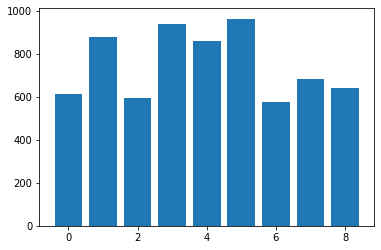

In [127]:
# Checking distribution after augmentation:
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
x,y=new_df['path'],new_df['cancer_type']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [128]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [132]:
# data_dir_train="path to directory with training data + data created using augmentor" # We have merged augmented data into the var 'data_dir_train'. hence we don't need to explicitly merge them again!
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,  # using the merged version of data_dir_train
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [133]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [134]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [135]:
## your code goes here
num_classes = 9

# Model - Rescaling -> Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> MaxPooling2D -> Dropout -> Dense -> Dense
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(16, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, 3, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [137]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [138]:
# Train the Model
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 33s 58ms/step - loss: 2.2823 - accuracy: 0.1510 - val_loss: 2.0588 - val_accuracy: 0.2598
Epoch 2/50
169/169 [==============================] - 4s 26ms/step - loss: 1.6907 - accuracy: 0.3553 - val_loss: 1.5318 - val_accuracy: 0.4462
Epoch 3/50
169/169 [==============================] - 4s 25ms/step - loss: 1.4204 - accuracy: 0.4640 - val_loss: 1.3744 - val_accuracy: 0.5071
Epoch 4/50
169/169 [==============================] - 4s 25ms/step - loss: 1.2782 - accuracy: 0.5263 - val_loss: 1.3692 - val_accuracy: 0.4803
Epoch 5/50
169/169 [==============================] - 4s 26ms/step - loss: 1.1733 - accuracy: 0.5718 - val_loss: 1.2866 - val_accuracy: 0.5338
Epoch 6/50
169/169 [==============================] - 4s 26ms/step - loss: 1.0597 - accuracy: 0.6194 - val_loss: 1.1619 - val_accuracy: 0.5709
Epoch 7/50
169/169 [==============================] - 5s 28ms/step - loss: 0.9635 - accuracy: 0.6508 - val_loss: 1.0284 - val_accuracy: 0.609

#### **Todo:**  Visualize the model results

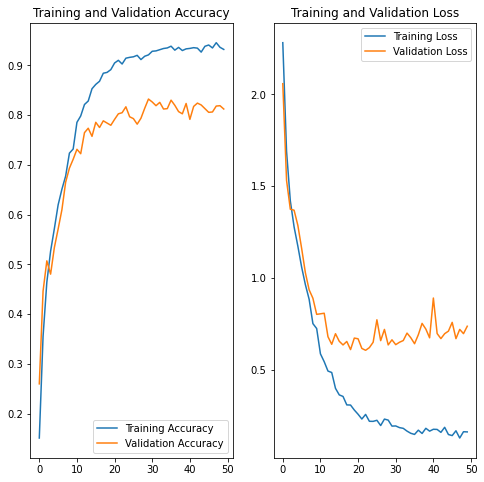

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

After augmentation with augmentor library, we are able to balance the class and built a good Model. 
- Training Accuracy=93%
- Validation Accuracy=81%
Thus we can conclude that the class rebalance helped and we have successfully removed the overfitting issue of the model.

